In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
import math
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df_base = pd.read_csv('src/data/fetal_health.csv')
df_base.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df_base.info()

<class 'pandas.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability             

In [5]:
df_base.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [12]:
print(df_base['fetal_health'].value_counts())
# fetal_health
# 1.0    1655 - Normal
# 2.0     295 - Suspect
# 3.0     176 - Pathological

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


In [9]:
# 'baseline value' Linha de base da Frequência Cardíaca Fetal FCF (batimentos por minuto)
# 'accelerations' Número de acelerações por segundo
# 'fetal_movement' Número de movimentos fetais por segundo
# 'uterine_contractions' Número de contrações uterinas por segundo
# 'light_decelerations' Número de desacelerações leves por segundo
# 'severe_decelerations' Número de desacelerações severas por segundo
# 'prolongued_decelerations' Número de desacelerações prolongadas por segundo
# 'abnormal_short_term_variability' Porcentagem de tempo com variabilidade anormal de curto prazo
# 'mean_value_of_short_term_variability' Valor médio da variabilidade de curto prazo
# 'percentage_of_time_with_abnormal_long_term_variability' Porcentagem de tempo com variabilidade anormal de longo prazo
# 'mean_value_of_long_term_variability' Valor médio da variabilidade de longo prazo
# 'histogram_width' Largura do histograma da FCF
# 'histogram_min' Mínimo (baixa frequência) do histograma da FCF
# 'histogram_max' Máximo (alta frequência) do histograma da FCF
# 'histogram_number_of_peaks' Número de picos do histograma
# 'histogram_number_of_zeroes' Número de zeros do histograma
# 'histogram_mode' Moda do histograma
# 'histogram_mean' Média do histograma
# 'histogram_median' Mediana do histograma
# 'histogram_variance' Variância do histograma
# 'histogram_tendency' Tendência do histograma

In [ ]:
list_plot = [
'baseline value',
'accelerations',
'mean_value_of_short_term_variability',
'uterine_contractions',
'fetal_movement',
'light_decelerations',
'abnormal_short_term_variability',
'percentage_of_time_with_abnormal_long_term_variability',
'mean_value_of_long_term_variability',
'histogram_width',
'histogram_min',
'histogram_max',
'histogram_number_of_peaks',
'histogram_mode',
'histogram_mean',
'histogram_median',
'histogram_variance',
'histogram_tendency',
'fetal_health']

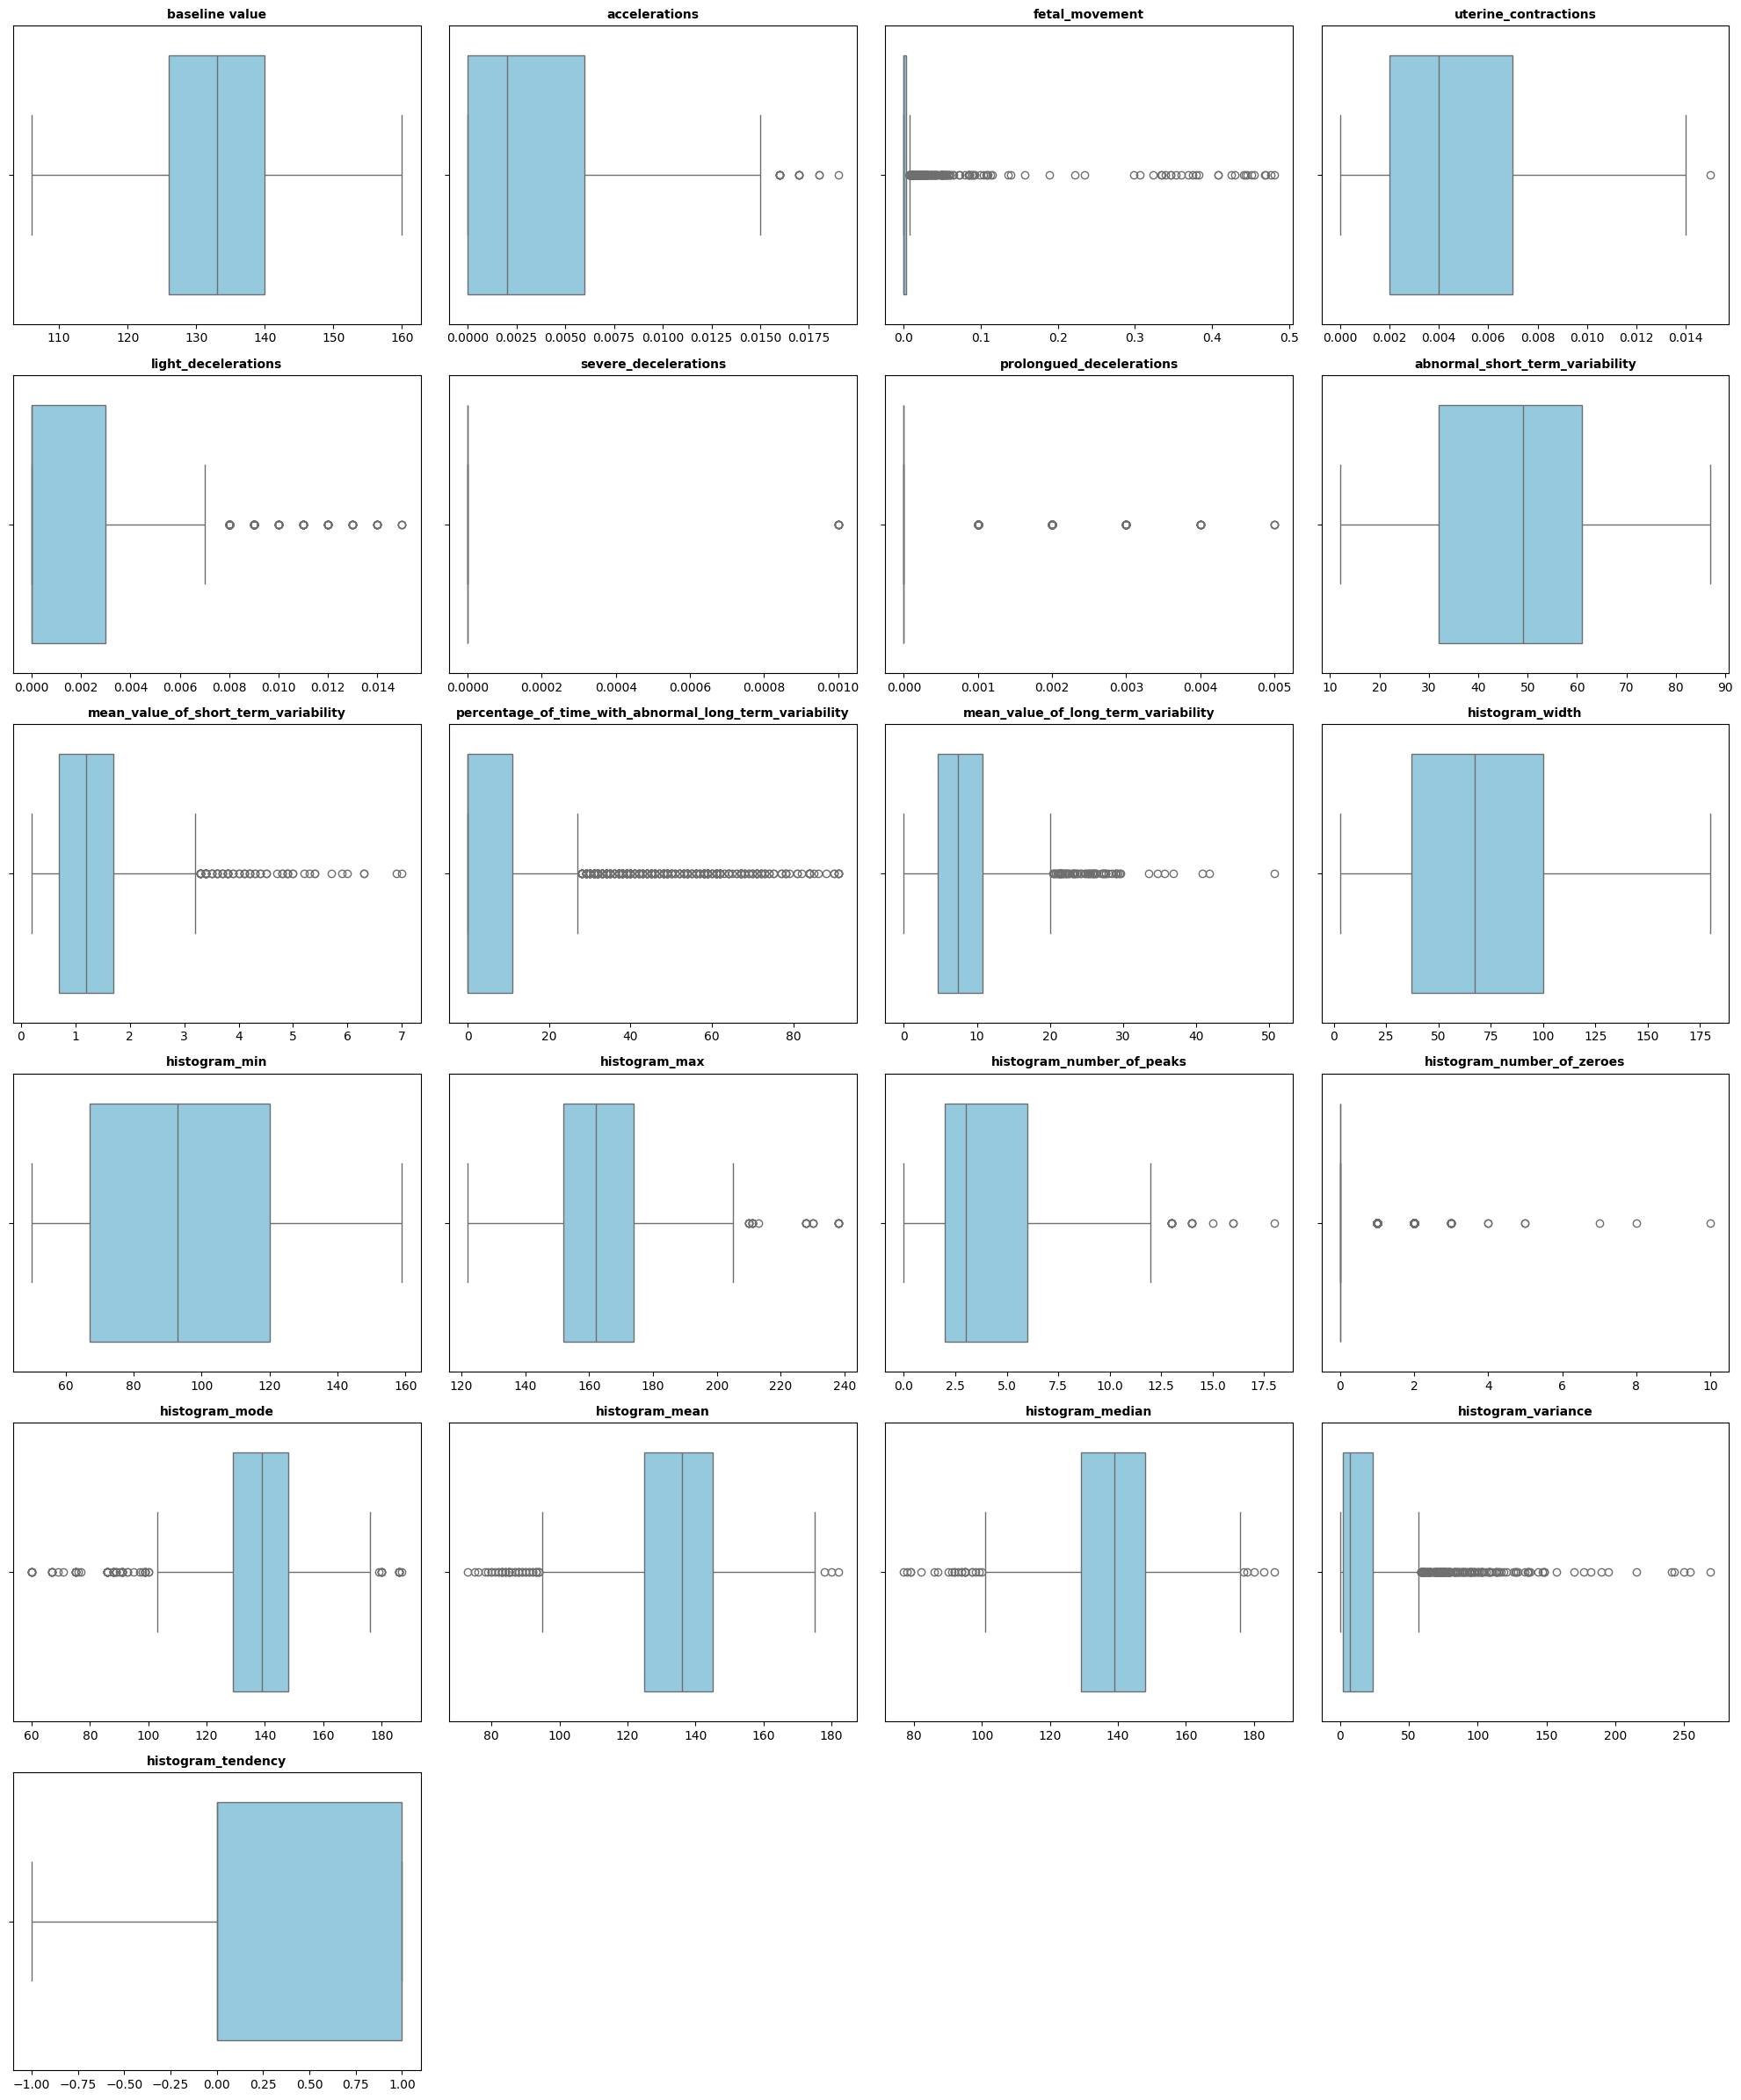

In [ ]:
features = [col for col in df_base.columns if col != 'fetal_health']

cols_plot = 4
rows_plot = math.ceil(len(features) / cols_plot)

fig, axes = plt.subplots(rows_plot, cols_plot, figsize=(20, 4 * rows_plot))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Gera o boxplot. 'x' define a variável, 'orient="h"' deixa horizontal (mais fácil de ler)
    sns.boxplot(x=df_base[feature], ax=ax, color='skyblue')
    
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ,+
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

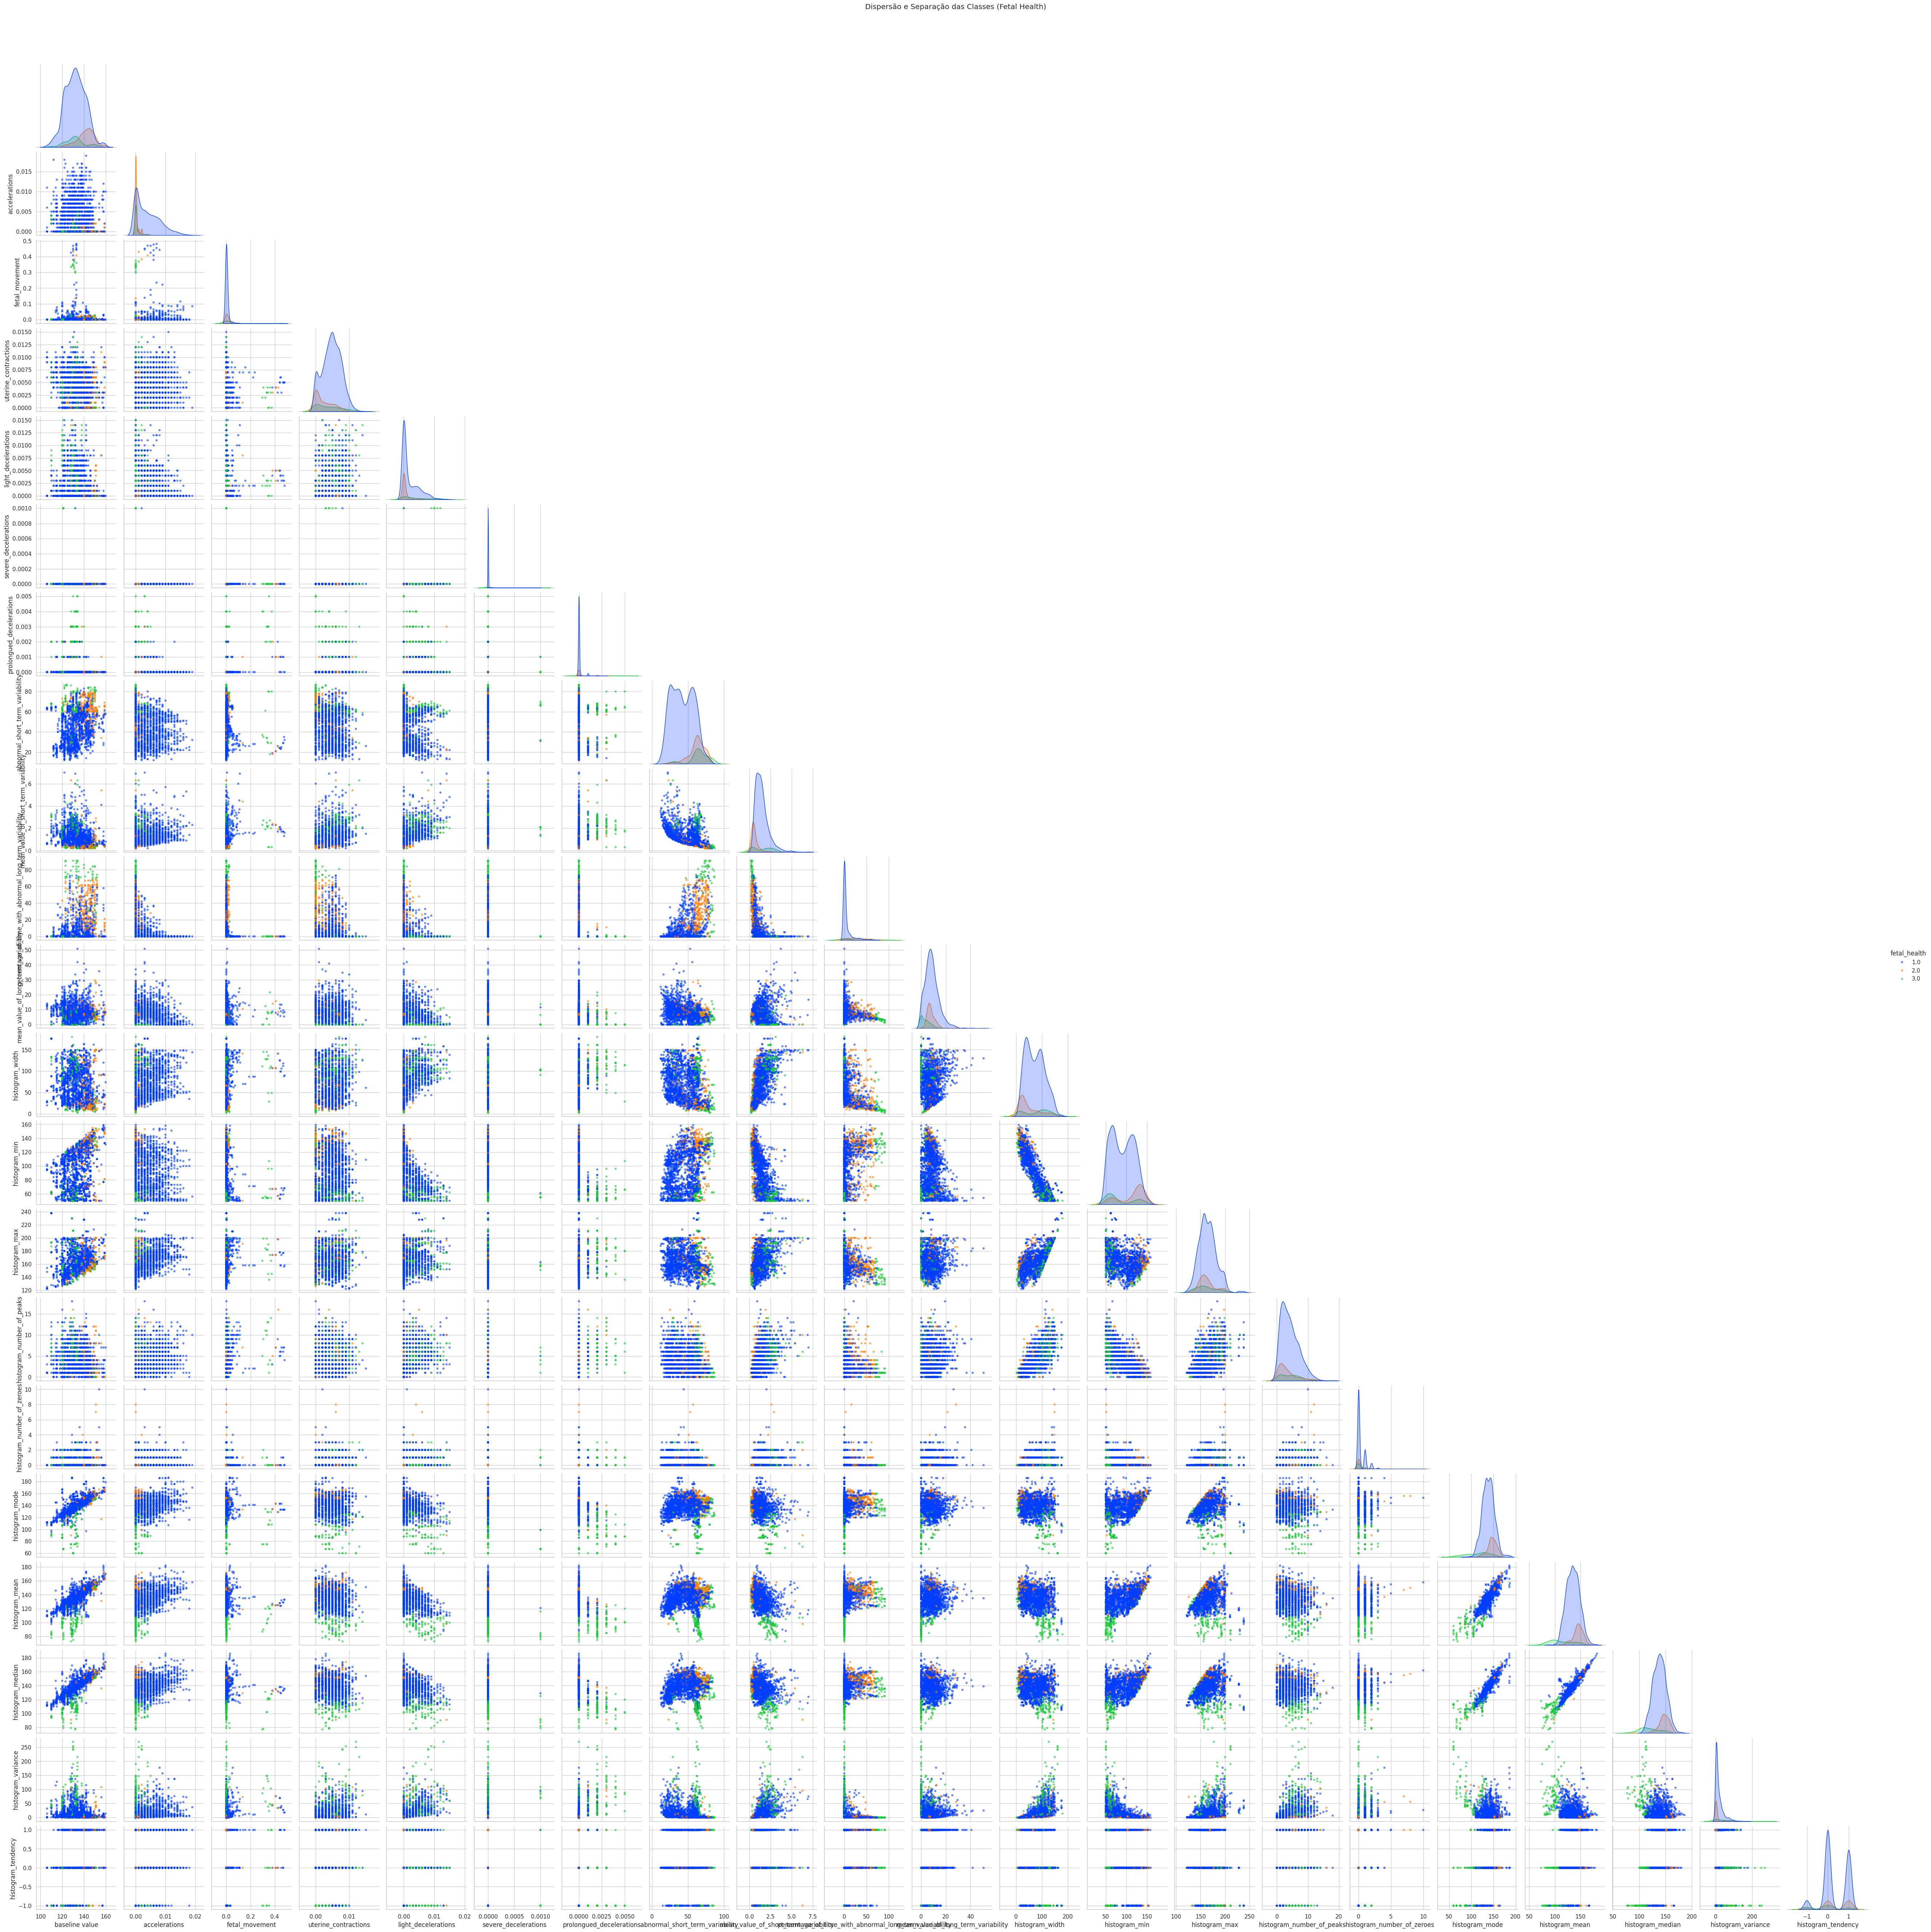

In [5]:
sns.set_theme(style="whitegrid") # Fundo branco com linhas ajuda na leitura

g = sns.pairplot(
    df_base, 
    hue='fetal_health',       # Separa as cores pela classe alvo
    palette='bright',        
    corner=True,              # Remove a metade superior (redundante)
    diag_kind='kde',          # Usa curvas de densidade na diagonal (melhor que histograma para ver sobreposição)
    plot_kws={
        'alpha': 0.6,         # Transparência (0 a 1): ajuda a ver onde os pontos se sobrepõem
        's': 15,              # Tamanho do ponto: menor é melhor para muitos dados
        'edgecolor': None     # Remove borda dos pontos para limpar o visual
    },
    diag_kws={
        'fill': True          # Preenche a curva de densidade na diagonal
    }
)

g.fig.suptitle("Dispersão e Separação das Classes (Fetal Health)", y=1.02)

# Exibe o gráfico
plt.show()

In [ ]:
df_base[['severe_decelerations', 'prolongued_decelerations', 'histogram_number_of_zeroes']].describe()
# Vou excluir essas variáveis, pois têm muitos valores zero e pouca variação, o que pode não contribuir para o modelo.

severe_decelerations  prolongued_decelerations  \
count           2126.000000               2126.000000   
mean               0.000003                  0.000159   
std                0.000057                  0.000590   
min                0.000000                  0.000000   
25%                0.000000                  0.000000   
50%                0.000000                  0.000000   
75%                0.000000                  0.000000   
max                0.001000                  0.005000   

       histogram_number_of_zeroes  
count                 2126.000000  
mean                     0.323612  
std                      0.706059  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                     10.000000